In [30]:
#Imports
import sys
import numpy as np              #Will be used for binning
import pandas as pd             #Will be used for data structuring
import lmfit as lf              #Fitting
import matplotlib.pyplot as plt #Basic plotting library
from matplotlib import cm
from matplotlib import colors
sys.path.append('../')
import R76Tools as R76          #Tools written by me for, e.x., importing our files
#Constants
frittspath = "/data/chocula/fritts/data/k100proc/midasrq/byseries/"
neogpath = "/data/chocula/neog/rq/"
def gaussian(x,mu=0,sigma=1,A=1):
    #x: data
    #mu: mean
    #sigma: std dev
    #A: amplitude
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

In [2]:
ser=["07221121_2214"]
datapath = frittspath
#Derived variables
_,z = R76.makechain_list(ser,path=datapath,filters=[R76.fittingfilters,"PTOFamps0","PTOFamps","Entry$"],aliases=R76.calibrationaliases)

In [34]:
crand=[]
for i,x in enumerate(z):
    crand.append(x['EventCategory']==1)
    x["BSel"]=x["PSUMbs"]-17700
    x["Entry$"]=x.index

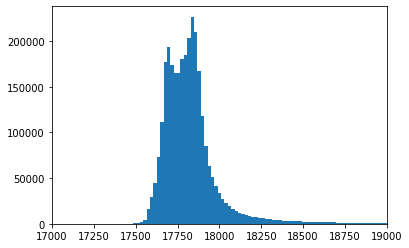

In [20]:
bins=np.linspace(17000,19000,100)
plt.hist(z[0]["PSUMbs"],bins=bins)
plt.xlim(bins[0],bins[-1])
plt.show()

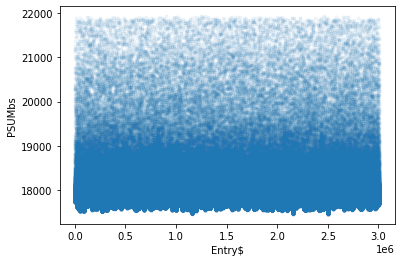

In [21]:
plt.scatter(z[0]["Entry$"][~crand[0]],z[0]["PSUMbs"][~crand[0]],marker=".",alpha=0.05)
plt.xlabel("Entry$")
plt.ylabel("PSUMbs")
plt.show()

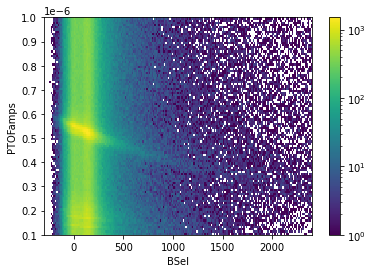

In [6]:
xbins=np.linspace(-300,2400,200)
ybins=np.linspace(10**(-7),10**(-6),100)
#fig,ax=plt.subplots()
#h=ax.hist2d(z[0]["PSUMbs"][~crand[0]],z[0]["PTOFamps"][~crand[0]],bins=[xbins,ybins])
#plt.show()
plt.hist2d(z[0]["BSel"][~crand[0]],z[0]["PTOFamps"][~crand[0]],bins=[xbins,ybins],norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("BSel")
plt.ylabel("PTOFamps")
plt.show()

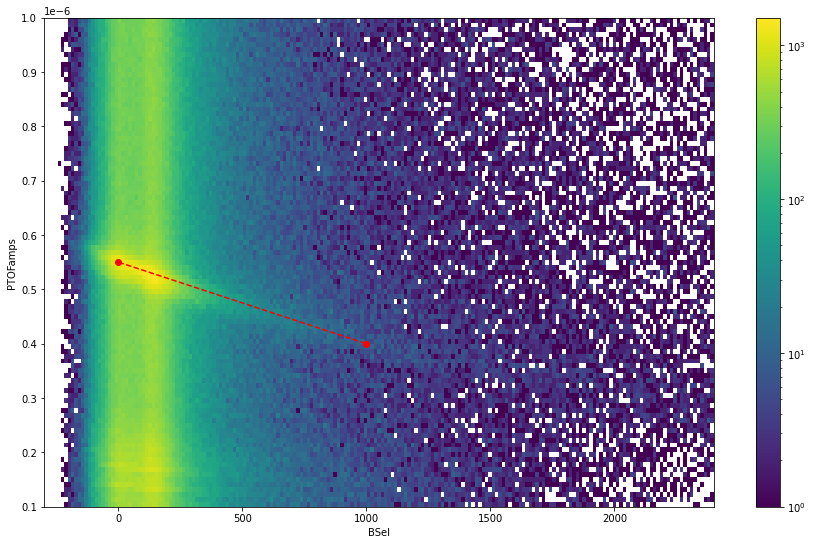

m = -1.5000000000000005e-10 b = 5.5e-07


In [4]:
point1 = [0, 0.55*10**(-6)]
point2 = [1000, 0.40*10**(-6)]
xbins=np.linspace(-300,2400,200)
ybins=np.linspace(10**(-7),10**(-6),100)
#fig,ax=plt.subplots()
#h=ax.hist2d(z[0]["PSUMbs"][~crand[0]],z[0]["PTOFamps"][~crand[0]],bins=[xbins,ybins])
#plt.show()
plt.figure(figsize=(15,9))
plt.hist2d(z[0]["BSel"][~crand[0]],z[0]["PTOFamps"][~crand[0]],bins=[xbins,ybins],norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("BSel")
plt.ylabel("PTOFamps")
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, 'ro', linestyle="--")
plt.show()
m = (point2[1]-point1[1])/(point2[0]-point1[0]); b = point1[1] - point1[0]*m
print("m =",m,"b =",b)

In [35]:
for x in z:
    x["PTOFamps_bscorr"]=x["PTOFamps"]/(1+m*x["BSel"]/b)
    x["PTOFamps0_bscorr"]=x["PTOFamps0"]/(1+m*x["BSel"]/b)

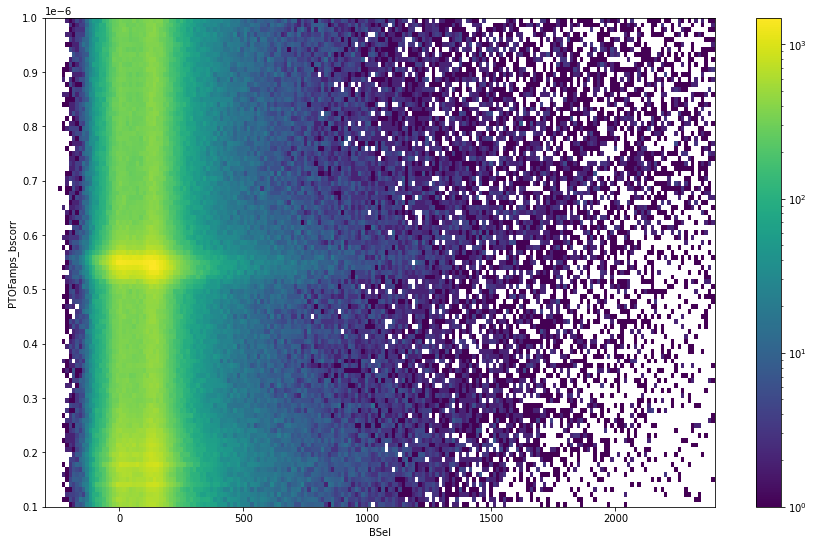

In [32]:
xbins=np.linspace(-300,2400,200)
ybins=np.linspace(10**(-7),10**(-6),100)
#fig,ax=plt.subplots()
#h=ax.hist2d(z[0]["PSUMbs"][~crand[0]],z[0]["PTOFamps"][~crand[0]],bins=[xbins,ybins])
#plt.show()
plt.figure(figsize=(15,9))
plt.hist2d(z[0]["BSel"][~crand[0]],z[0]["PTOFamps_bscorr"][~crand[0]],bins=[xbins,ybins],norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("BSel")
plt.ylabel("PTOFamps_bscorr")
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.show()

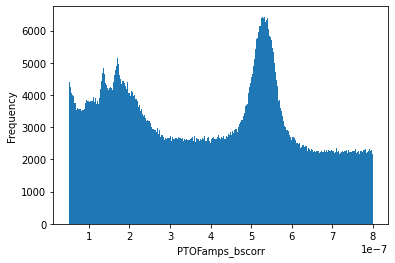

300

In [50]:
h=plt.hist(z[0]["PTOFamps_bscorr"][~crand[0]],bins=np.linspace(0.05*10**(-6),0.8*10**(-6),300))
plt.xlabel("PTOFamps_bscorr")
plt.ylabel("Frequency")
plt.show()
len(h[1])

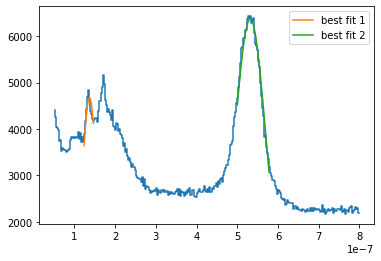

07221121_2214 p1: 9.81e7, p2: 2.6e13


In [65]:
y=h[0];x=(h[1][:-1] + h[1][1:])/2
y1=np.array([]);x1=np.array([]);y2=np.array([]);x2=np.array([])
fit1lo,fit1hi=0.122e-6,0.147e-6
fit2lo,fit2hi=0.50e-6,0.58e-6
for i,xval in enumerate(x):
    if ((xval >= fit1lo) and (xval <= fit1hi)):
        y1=np.append(y1,y[i])
        x1=np.append(x1,x[i])
for i,xval in enumerate(x):
    if ((xval >= fit2lo) and (xval <= fit2hi)):
        y2=np.append(y2,y[i])
        x2=np.append(x2,x[i])
gmodel1 = lf.Model(gaussian)
params1 = gmodel1.make_params(mu=(fit1lo+fit1hi)/2, sigma=0.05*10**(-6), A=4000)
result1 = gmodel1.fit(y1, x=x1, mu=(fit1lo+fit1hi)/2, sigma=0.05*10**(-6), A=4000)
gmodel2 = lf.Model(gaussian)
params2 = gmodel2.make_params(mu=(fit2lo+fit2hi)/2, sigma=0.05*10**(-6), A=4000)
result2 = gmodel2.fit(y2, x=x2, mu=(fit2lo+fit2hi)/2, sigma=0.05*10**(-6), A=4000)
#print(result.fit_report())
plt.step(x,y)
#plt.plot(x1, result.init_fit, '--', label='initial fit')
plt.plot(x1, result1.best_fit, '-', label='best fit 1')
plt.plot(x2, result2.best_fit, '-', label='best fit 2')
plt.legend()
plt.show()
x = [result1.params["mu"].value,result2.params["mu"].value]
y = [13.95,59.54]
a = (y[0]*x[1]-y[1]*x[0])/(x[0]*x[1]*(x[0]-x[1]))
b=(y[1]*x[0]**2-y[0]*x[1]**2)/(x[0]**2*x[1]-x[0]*x[1]**2)
print(ser[0]," p1: ",round(b/1e7,2),"e7",", p2: ",round(a/1e13,2),"e13",sep="") # c has to be 0!

In [27]:
for x in z:
    x["pt_keVee"]=b*x["PTOFamps_bscorr"]+a*x["PTOFamps_bscorr"]**2
    x["pt0_keVee"]=b*x["PTOFamps0_bscorr"]+a*x["PTOFamps0_bscorr"]**2

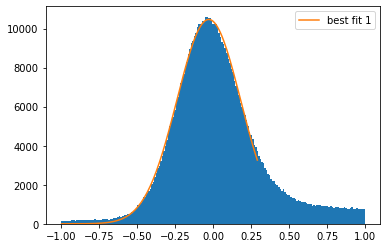

Parameters([('mu', <Parameter 'mu', value=-0.02771573373544516 +/- 0.000786, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=0.20902086422017496 +/- 0.000862, bounds=[-inf:inf]>), ('A', <Parameter 'A', value=10465.855855905835 +/- 32.8, bounds=[-inf:inf]>)])


In [53]:
fit1lo=-1
fit1hi=0.3
h1=plt.hist(z[0]["pt0_keVee"],bins=np.linspace(-1,1,200))
y=h1[0];x=(h1[1][:-1] + h1[1][1:])/2
y1=np.array([]);x1=np.array([])
for i,xval in enumerate(x):
    if ((xval >= fit1lo) and (xval <= fit1hi)):
        y1=np.append(y1,y[i])
        x1=np.append(x1,x[i])
gmodel1 = lf.Model(gaussian)
params1 = gmodel1.make_params(mu=0, sigma=0.3, A=10000)
result1 = gmodel1.fit(y1, x=x1, mu=0, sigma=0.3, A=10000)
plt.plot(x1, result1.best_fit, '-', label='best fit 1')
plt.legend()
plt.show()
print(result1.params)

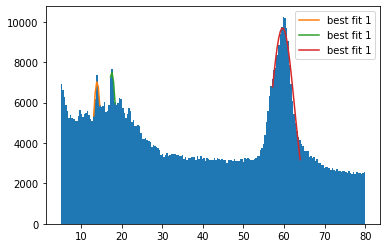

Parameters([('mu', <Parameter 'mu', value=13.932380156621862 +/- 0.066, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=1.1156197570371444 +/- 0.153, bounds=[-inf:inf]>), ('A', <Parameter 'A', value=7041.671415938988 +/- 255, bounds=[-inf:inf]>)])
Parameters([('mu', <Parameter 'mu', value=17.556467013301283 +/- 0.1, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=1.2089308044330827 +/- 0.207, bounds=[-inf:inf]>), ('A', <Parameter 'A', value=7510.777936324109 +/- 167, bounds=[-inf:inf]>)])
Parameters([('mu', <Parameter 'mu', value=59.65117394879644 +/- 0.0927, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=2.8984632902652145 +/- 0.125, bounds=[-inf:inf]>), ('A', <Parameter 'A', value=9700.041445885616 +/- 195, bounds=[-inf:inf]>)])


In [74]:
fit1lo=13
fit1hi=14.7
fit2lo=17.1
fit2hi=18.4
fit3lo=57
fit3hi=64
h2=plt.hist(z[0]["pt_keVee"],bins=np.linspace(5,80,200))
y=h2[0];x=(h2[1][:-1] + h2[1][1:])/2
y1=np.array([]);x1=np.array([])
for i,xval in enumerate(x):
    if ((xval >= fit1lo) and (xval <= fit1hi)):
        y1=np.append(y1,y[i])
        x1=np.append(x1,x[i])
y2=np.array([]);x2=np.array([])
for i,xval in enumerate(x):
    if ((xval >= fit2lo) and (xval <= fit2hi)):
        y2=np.append(y2,y[i])
        x2=np.append(x2,x[i])
y3=np.array([]);x3=np.array([])
for i,xval in enumerate(x):
    if ((xval >= fit3lo) and (xval <= fit3hi)):
        y3=np.append(y3,y[i])
        x3=np.append(x3,x[i])
gmodel1 = lf.Model(gaussian)
params1 = gmodel1.make_params(mu=14, sigma=0.3, A=7000)
result1 = gmodel1.fit(y1, x=x1, mu=14, sigma=0.3, A=7000)
gmodel2 = lf.Model(gaussian)
params2 = gmodel1.make_params(mu=18, sigma=0.3, A=7000)
result2 = gmodel1.fit(y2, x=x2, mu=18, sigma=0.3, A=7000)
gmodel3 = lf.Model(gaussian)
params3 = gmodel1.make_params(mu=60, sigma=0.3, A=7000)
result3 = gmodel1.fit(y3, x=x3, mu=60, sigma=0.3, A=7000)
plt.plot(x1, result1.best_fit, '-', label='best fit 1')
plt.plot(x2, result2.best_fit, '-', label='best fit 1')
plt.plot(x3, result3.best_fit, '-', label='best fit 1')
plt.legend()
plt.show()
print(result1.params)
print(result2.params)
print(result3.params)